In [18]:
from graphviz import Digraph

In [19]:
class ArbreBinaire:
    def __init__(self,cle , gauche = None, droite = None):
        self.cle = cle
        self.gauche = gauche
        self.droite = droite

In [20]:
class DST :
    def __init__(self, dico , c = None):
        self.dico = dico  # Exemple : dico = {'a':'01','b':'11','c':'00','d':'10'}
        self.racine = None            

    # def ArbreVide(self):
    #     return None

    # def EstArbreVide(self):
    #     return self.racine is None
    
    # def Racine(self):
    #     return self.racine.cle
    
    # def SousArbreGauche(self):
    #     return self.racine.gauche
    
    # def SousArbreDroit(self):
    #     return self.racine.droite

    def car(self, c , i):
        """DST * str * int -> int/None"""
        """Renvoie le i-ème caractère de l'encodage de c, lorsque c existe dans le dictionnaire, None sinon"""
        for k , v in self.dico.items():
            if k == c and len(v)-1 >= i:
                res= v[i]
                return int(res)
        return None

    def duplique(self , A): #A est un arbre binaire
        """DST * ArbreBinaire -> ArbreBinaire"""
        """Renvoie une copie de l'arbre binaire A"""
        #print("passage ?")
        if A is None:
            return None
        else:
            return ArbreBinaire(A.cle, self.duplique(A.gauche), self.duplique(A.droite))
        

    def ajout(self, c ): #c est un caractère
        """DST * str -> ArbreBinaire"""
        """Renvoie un arbre binaire contenant le caractère c"""
        return self._ajout(c , 0 , self.racine)

    def _ajout(self, c , i , A): #A est un arbre binaire
        """DST * str * int * ArbreBinaire -> ArbreBinaire"""
        """Renvoie un arbre binaire contenant le caractère c"""
        if A is None:
            return ArbreBinaire(c, None, None)

        if c == A.cle:
            return A
        if self.car(c,i) == 0 :
            newD = self.duplique(A.droite)
            return ArbreBinaire(A.cle, self._ajout(c , i+1 , A.gauche), newD)
        
        if self.car(c,i) == 1 :
            newG = self.duplique(A.gauche)
            return ArbreBinaire(A.cle, newG, self._ajout(c , i+1 , A.droite))

        return A # Dans le cas ou le caractère n'est pas trouvé



    def recherche(self, c): #c est un caractère
        """DST * str -> bool"""
        """Renvoie True si le caractère c est dans l'arbre, False sinon"""
        return self._recherche( self.racine, c , 0)
    
    def _recherche(self, A,  c , i):    #A est un arbre binaire
        """DST * ArbreBinaire * str * int -> bool"""
        """Renvoie True si le caractère c est dans l'arbre, False sinon"""
        if A is None: 
            return False
        if c == A.cle:    
            return True
        if self.car(c,i) == 0 :  
            return self._recherche(A.gauche , c , i+1)
        else :     
            return self._recherche(A.droite , c , i+1)
        
        

    def supprime(self, c): #c est un caractère
        """DST * str -> ArrbreBinaire"""
        """Supprime le caractère c de l'arbre binaire"""
        return self._supprime(self.racine, c , 0)
    

    def _supprime(self, A , c , i): # CBinaire est un caractère binaire, exemple : '0101'
        """DST * ArbreBinaire * str * int -> ArbreBinaire"""
        """Supprime le caractère c de l'arbre binaire"""
        if A is None:   #Si l'arbre est vide
            return None
        
        if c == A.cle:      #Si le caractère est trouvé, on verifie tous les cas
            #cas si on est sur la racine
            if A.gauche is None and A.droite is None and self.racine.cle == A.cle and self.racine.gauche is None and self.racine.droite is None:
                return None
            if A.gauche is None and self.racine.cle == A.cle and self.racine.gauche == A.gauche:
                return self.duplique(A.droite)
            
            if A.droite is None and self.racine.cle == A.cle and self.racine.droite == A.droite:
                #return ArbreBinaire(A.cle, A.gauche, None)
                return self.duplique(A.gauche)
            
            #cas hors de la racine
            if A.gauche is None and A.droite is None:
                return None
            if A.gauche is None:  
                return self.duplique(A.droite) 
                #return ArbreBinaire(A.cle, None, A.droite) #Fonctionne pas
            if A.droite is None:    
                return self.duplique(A.gauche)
                #return ArbreBinaire(A.cle, A.gauche, None) #Fonctionne pas
            
            else:   #Si le noeud a deux fils
                noeud = self.noeud_min(A.droite)
                newG = self.duplique(A.gauche)
                newD = self.duplique(A.droite)#devrais-je le mettre a la place de A.droite ? a voir
                return ArbreBinaire(noeud.cle, newG, self._supprime(A.droite,noeud.cle , i+1) )
        if self.car(c,i) == 0 :  
            newD = self.duplique(A.droite)
            return ArbreBinaire(A.cle, self._supprime(A.gauche , c , i+1), newD)
        else :#self.car(c,i) == 1:     
            newG = self.duplique(A.gauche)
            return ArbreBinaire(A.cle, newG, self._supprime(A.droite , c , i+1))




    def noeud_min(self, A ):    #A est un arbre binaire
        """DST * ArbreBinaire -> ArbreBinaire"""
        """Renvoie le noeud le plus à gauche, qui est le plus petit noeud de l'arbre binaire A"""
        cur = A  
        while (cur.gauche is not None): 
            cur = cur.gauche
        return cur
        

    def construction(self):
        """DST -> DST"""
        """Construit l'arbre binaire à partir du dictionnaire"""
        for c in self.dico:
            self.racine = self.ajout(c)
        return self


    # def visualiser_arbre(self):
    #     dot = Digraph()


    #     def generer_graphique(noeud): 
    #         if noeud is not None:
    #             dot.node(str(noeud.cle))
    #             if noeud.gauche is not None:
    #                 dot.node(str(noeud.gauche.cle))
    #                 dot.edge(str(noeud.cle), str(noeud.gauche.cle) , label = '0', fontsize = '10')
    #                 generer_graphique(noeud.gauche)
    #             if noeud.droite is not None:
    #                 dot.node(str(noeud.droite.cle))
    #                 dot.edge(str(noeud.cle), str(noeud.droite.cle) , label = '1', fontsize = '10')
    #                 generer_graphique(noeud.droite)

    #     generer_graphique(self.racine)
    #     return dot

    def visualiser_arbre(self):
        """DST -> Digraph"""
        """Renvoie un Digraph qui représente l'arbre binaire"""
        dot = Digraph()

        cpt = 0

        def generer_graphique(noeud):
            nonlocal cpt
            if noeud is not None:
                dot.node(str(noeud.cle))
                if noeud.gauche is not None:
                    dot.edge(str(noeud.cle), str(noeud.gauche.cle) , label = "0" , fontsize="10")
                    generer_graphique(noeud.gauche)
                else:
                    cpt += 1
                    dot.node(f"empty_{cpt}", shape="point", fillcolor="white" , width="0.5")
                    dot.edge(str(noeud.cle), f"empty_{cpt}" , label = "0" , fontsize="10")
                if noeud.droite is not None:
                    dot.edge(str(noeud.cle), str(noeud.droite.cle) , label = "1" , fontsize="10" )
                    generer_graphique(noeud.droite)
                else:
                    cpt += 1
                    dot.node(f"empty_{cpt}", shape="point", fillcolor="white" , width="0.5")
                    dot.edge(str(noeud.cle), f"empty_{cpt}" , label = "1" , fontsize="10")

        generer_graphique(self.racine)
        return dot


    def afficher_arbre(self , arbre, niveau=0):
        if arbre is not None:
            self.afficher_arbre(arbre.droite, niveau + 1)
            if niveau > 0:
                print('   ' * (niveau - 1) + '|--', end='')
            print(str(arbre.cle))
            self.afficher_arbre(arbre.gauche, niveau + 1)

In [21]:
def test_DST():
    #tab = [('A','00001'),('S','10011'),('E','00101'),('R','10010'),('C','00011'),('H','01000'),('I','01001'),('N','01110'),('G','00111'),('X','11000'),('M','01101'),('P','10000'),('L','01100')]
    dico = {'A': '00001', 'S': '10011', 'E': '00101', 'R': '10010', 'C': '00011', 'H': '01000', 'I': '01001', 'N': '01110', 'G': '00111', 'X': '11000', 'M': '01101', 'P': '10000', 'L': '01100'}
    dst = DST(dico)

    dst = dst.construction()
    # print(dst.racine.cle)   #A
    # print(dst.racine.gauche.cle)    #E
    # print(dst.racine.droite.cle)    #S
    # print(dst.racine.gauche.gauche.cle) #C
    # print(dst.racine.gauche.droite.cle) #H
    # print(dst.racine.droite.gauche.cle) #R
    # print(dst.racine.droite.droite.cle) #X
    # print(dst.racine.gauche.gauche.droite.cle)  #G
    # print(dst.racine.gauche.droite.gauche.cle)  #I
    # print(dst.racine.gauche.droite.droite.cle)  #N
    # print(dst.racine.gauche.droite.droite.gauche.cle)   #M
    # print(dst.racine.droite.gauche.gauche.cle)  #P
    # print(dst.racine.gauche.droite.droite.gauche.gauche.cle)    #L

    dst.afficher_arbre(dst.racine)

    for k in dico.keys():
        trouver = dst.recherche(k)
        print("trouver",k,"?",trouver)

    # trouver = dst.recherche('B')
    # print("trouver B ?",trouver)
    # print("-----------------------")
    # suppr = dst.supprime('E')
    # trouver = dst.recherche('E')
    # print("suppr E ",not(trouver))
    # dst.afficher_arbre(dst.racine)

    # print("-----------------------")
    # suppr = dst.supprime('A')
    # trouver = dst.recherche('A')
    # print("suppr A ",not(trouver))
    # dst.afficher_arbre(dst.racine)

test_DST()

   |--X
|--S
   |--R
      |--P
A
      |--N
         |--M
            |--L
   |--H
      |--I
|--E
      |--G
   |--C
trouver A ? True
trouver S ? True
trouver E ? True
trouver R ? True
trouver C ? True
trouver H ? True
trouver I ? True
trouver N ? True
trouver G ? True
trouver X ? True
trouver M ? True
trouver P ? True
trouver L ? True


TEST

Tester Ajout

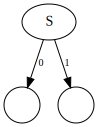

In [22]:
dico = {'A': '00001', 'S': '10011', 'E': '00101', 'R': '10010', 'C': '00011', 'H': '01000', 'I': '01001', 'N': '01110', 'G': '00111', 'X': '11000', 'M': '01101', 'P': '10000', 'L': '01100'}


test_DST1 = DST(dico)
test_DST1.racine = test_DST1.ajout('S')
# visualiser_arbre(test_DST1.racine)
test_DST1.visualiser_arbre()

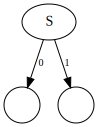

In [23]:
#Cette lettre n'existe pas dans le dictionnaire
test_DST1.racine = test_DST1.ajout('B')
test_DST1.visualiser_arbre()

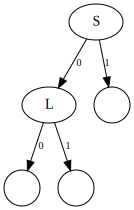

In [24]:
test_DST1.racine = test_DST1.ajout('L')
test_DST1.visualiser_arbre()

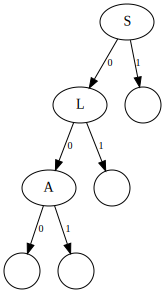

In [25]:
test_DST1.racine = test_DST1.ajout('A')
test_DST1.visualiser_arbre()

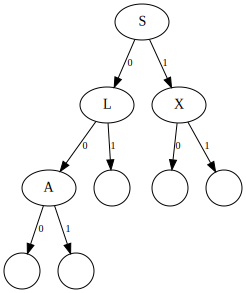

In [26]:
test_DST1.racine = test_DST1.ajout('X')
test_DST1.visualiser_arbre()

Tester Suppression


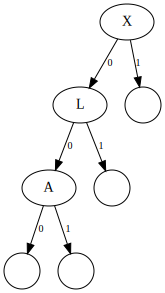

In [27]:
test_DST1.racine = test_DST1.supprime('S')
test_DST1.visualiser_arbre()

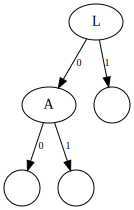

In [28]:
#test_DST1.racine = test_DST1.supprime('X') #il faut le re affecter, cas unique ... a modifier
test_DST1.racine = test_DST1.supprime('X')
test_DST1.visualiser_arbre()

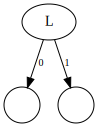

In [29]:
test_DST1.racine = test_DST1.supprime('A')
test_DST1.visualiser_arbre()

In [30]:
test_DST1.racine = test_DST1.supprime('L')
test_DST1.visualiser_arbre()

Tester Construction

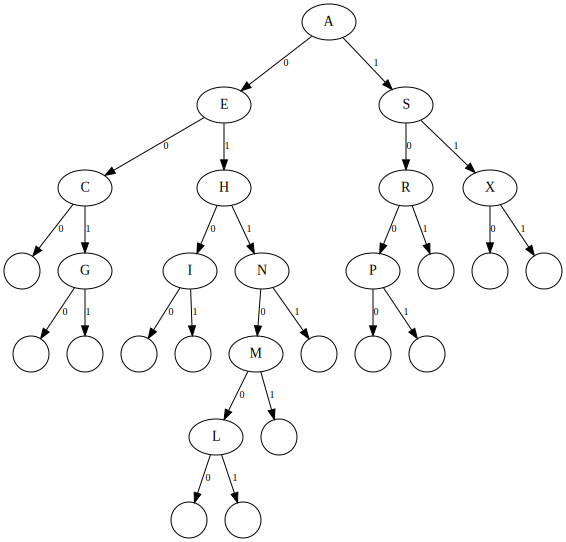

In [31]:
test_DST2 = DST(dico)
test_DST2 = test_DST2.construction()
test_DST2.visualiser_arbre()


Tester Suppression

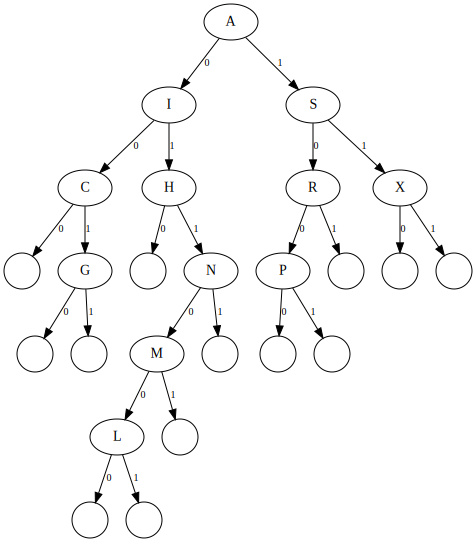

In [32]:
test_DST2.racine = test_DST2.supprime('E')
test_DST2.visualiser_arbre()

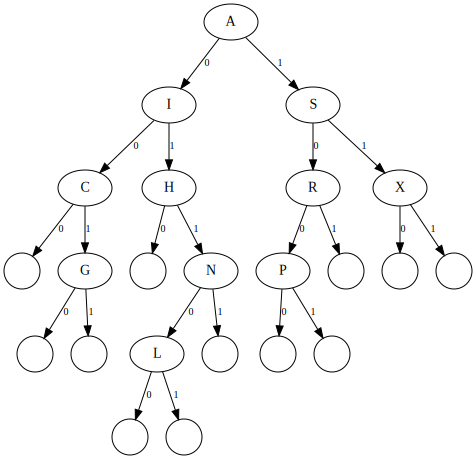

In [33]:
test_DST2.racine = test_DST2.supprime('M')
test_DST2.visualiser_arbre()

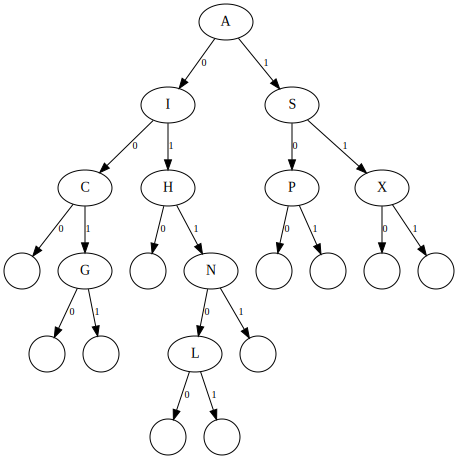

In [34]:
test_DST2.racine = test_DST2.supprime('R')
test_DST2.visualiser_arbre()